<a href="https://colab.research.google.com/github/HishitaGupta/Colab-Notebooks/blob/main/XRay_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# This will prompt you to authorize access
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/My Drive/Hishita Colab/chest_xray-20250726T110654Z-1-001.zip'


In [ ]:
import zipfile
import os

# Choose a directory to extract
extract_dir = '/content/xray_images'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)


Files extracted to: /content/xray_images


In [ ]:
import os

# List first 10 files
print(os.listdir('/content/xray_images/chest_xray/test/NORMAL')[:10])


['IM-0005-0001.jpeg', 'NORMAL2-IM-0251-0001.jpeg', 'NORMAL2-IM-0120-0001.jpeg', 'NORMAL2-IM-0347-0001.jpeg', 'IM-0059-0001.jpeg', 'NORMAL2-IM-0374-0001-0002.jpeg', 'NORMAL2-IM-0361-0001.jpeg', 'NORMAL2-IM-0317-0001.jpeg', 'IM-0091-0001.jpeg', 'IM-0033-0001-0002.jpeg']


In [ ]:
Datadir ='/content/xray_images/chest_xray/train'

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

In [ ]:
# initialising categories of classification
CATEGORIES =["NORMAL","PNEUMONIA"]

In [ ]:
# Converting images to grayscale
for i in CATEGORIES:
  path = os.path.join(Datadir,i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    # plt.imshow(img_array,cmap='gray')
    # plt.show()
  #   break
  # break

In [ ]:
# Initialising the size of the image so that every image is in same dimension
img_size= 100

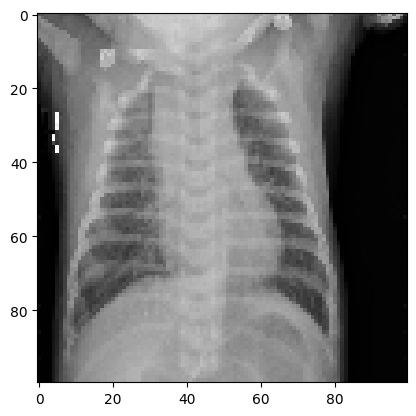

In [ ]:
# image after resize and grayscale
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

array([[ 89,  80,  91, ..., 177, 142,  47],
       [138, 103,  87, ..., 153,  64,  22],
       [130, 143, 124, ...,  38,  35,  19],
       ...,
       [  2,   1,   1, ...,   3,   3,   3],
       [  1,   1,   1, ...,   3,   3,   4],
       [  1,   1,   1, ...,   3,   3,   3]], dtype=uint8)
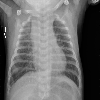

In [ ]:
new_array


In [ ]:
training_data =[]

In [ ]:
# defining the function for training data according to thr categories converting the images ot grayscale with resizing the image into 100X100

# converting it to numpy arrays

def create_training_data():
  for i in CATEGORIES:

    path = os.path.join(Datadir,i)
    class_num = CATEGORIES.index(i)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array, class_num])

      except Exception as e:
        pass

In [ ]:
create_training_data()

In [ ]:
print(len(training_data))

5226


In [ ]:
training_data

[[array([[18, 10,  7, ...,  0,  0,  0],
         [24, 14, 12, ...,  0,  0,  0],
         [29, 26, 18, ...,  0,  0,  0],
         ...,
         [ 0,  4, 22, ...,  0,  0,  0],
         [ 0, 10, 26, ...,  0,  0,  0],
         [ 0, 11, 32, ...,  0,  0,  0]], dtype=uint8),
  0],
 [array([[ 54, 110, 113, ...,  75,  82,  88],
         [ 50, 108,  91, ...,  87,  98,  96],
         [ 41,  96,  86, ...,  92, 102, 106],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
  0],
 [array([[104, 103,  99, ...,  86, 131, 204],
         [100,  98,  97, ...,  86, 126, 202],
         [ 98, 101,  96, ...,  88, 116, 195],
         ...,
         [  0,   0,   0, ...,   0,   0,   7],
         [  0,   0,   0, ...,   0,   0,   6],
         [  0,   0,   0, ...,   0,   0,   6]], dtype=uint8),
  0],
 [array([[ 0,  0,  0, ..., 91, 77, 63],
         [ 0,  0,  0, ..., 89, 73, 57],
         [ 0,  0,  0, .

In [ ]:
X =[]
y=[]

In [ ]:
# splitting the features and labels
for features,label in training_data:
  X.append(features)
  y.append(label)

In [ ]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[18]
   [10]
   [ 7]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[24]
   [14]
   [12]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[29]
   [26]
   [18]
   ...
   [ 0]
   [ 0]
   [ 0]]

  ...

  [[ 0]
   [ 4]
   [22]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [10]
   [26]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [11]
   [32]
   ...
   [ 0]
   [ 0]
   [ 0]]]]


In [ ]:
y = np.array(y)

In [ ]:
# reshaping the features for making it compatible with tensorflow
X = np.array(X).reshape(-1,img_size,img_size,1)

In [ ]:
# as we do for training data similarly doing with validation data
validation_data =[]
Datadir_val ='/content/xray_images/chest_xray/test'

In [ ]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(Datadir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])

            except Exception as e:
                pass

In [ ]:
create_validating_data()

In [ ]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
  print(sample)

[array([[118, 102, 113, ...,  65,  66,  66],
       [102, 111, 113, ...,  67,  68,  70],
       [ 92, 114, 116, ...,  70,  70,  72],
       ...,
       [ 13,  12,  44, ...,  51,   0,   4],
       [ 13,  12,  40, ...,  47,   0,   4],
       [ 14,  12,  41, ...,  47,   0,   5]], dtype=uint8), 1]
[array([[12, 21, 28, ...,  0,  0,  0],
       [10, 21, 29, ...,  0,  0,  0],
       [ 8, 19, 28, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 1]
[array([[0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]
[array([[50, 55, 52, ..., 46, 39, 60],
       [50, 54, 58, ..., 46, 44, 74],
       [51, 57, 60, ..., 48, 44, 54],
       ...,
       [25, 21, 20, ..., 21, 21, 21],
       [29, 22, 20, ..., 21, 21, 25],
       [24, 22, 20, 

In [ ]:
X_val=[]
y_val=[]

In [ ]:
for features,label in validation_data:
  X_val.append(features)
  y_val.append(label)

In [ ]:
y_val = np.array(y_val)
X_val = np.array(X_val).reshape(-1,img_size,img_size,1)

In [ ]:
# Importing the library for training the model and adding the neuron network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle


In [ ]:
# Pixel value ranges from 0 to 255, 0 means black , 255 means white
# In order to scale it down to scale of 0 to 1, we are performing this step

X =np.array(X/255.0)
x_val =np.array(X_val/255.0)

In [ ]:
X.shape

(5226, 100, 100, 1)

In [ ]:
x_val.shape

(624, 100, 100, 1)

In [ ]:
# initialising the neural network layer for training the model

model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:])) # 64 filters
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1)) # beccause binary classification
model.add(Activation('sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# fitting the model with 10 epochs and using the validation data we have created
model.fit(X,y,batch_size=4, epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8443 - loss: 0.3859 - val_accuracy: 0.7035 - val_loss: 1.0534
Epoch 2/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9454 - loss: 0.1526 - val_accuracy: 0.7003 - val_loss: 0.6549
Epoch 3/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9519 - loss: 0.1286 - val_accuracy: 0.7308 - val_loss: 1.0324
Epoch 4/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9617 - loss: 0.1058 - val_accuracy: 0.7179 - val_loss: 1.2429
Epoch 5/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9648 - loss: 0.0971 - val_accuracy: 0.7532 - val_loss: 1.0161
Epoch 6/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9666 - loss: 0.0899 - val_accuracy: 0.7660 - val_loss: 1.0326
Epoch 7/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9735 - loss: 0.0711 - val_accuracy: 0.7676 - val_loss: 0.8260
Epoch 8/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9731 - loss: 0.0669 

In [ ]:
# saving the model
model.save(r"/content/drive/MyDrive/Hishita Colab/X-Ray Image Classification/chest_xray/model_first.h5")

In [ ]:
# importing the library for tesiting the model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

In [ ]:
CATEGORIES =['NORMAL','PNEUMONIA']

In [ ]:
def prepare(image):
  img_size =100
  img = tf.keras.preprocessing.image.load_img(image,color_mode='grayscale',target_size =(img_size,img_size))
  new_array = tf.keras.preprocessing.image.img_to_array(img)

  return new_array.reshape(-1,img_size,img_size,1)

In [ ]:
model = tf.keras.models.load_model("/content/drive/My Drive/Hishita Colab/X-Ray Image Classification/chest_xray/model_first.h5")

In [ ]:
image = r'/content/xray_images/chest_xray/test/NORMAL/IM-0059-0001.jpeg'

In [ ]:
prediction = model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(1, 100, 100, 1))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step
[[0.00063231]]
0
NORMAL


In [ ]:
image2 = r'/content/xray_images/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg'

In [ ]:
prediction = model.predict([prepare(image2)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.99998677]]
1
PNEUMONIA


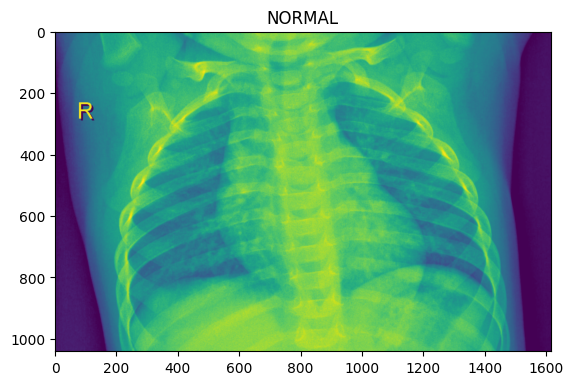

In [ ]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()